In [14]:
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



------------------------------------------
✅ Runtime: 17.7 ms | 💾 Mem: 28.84 MB (Δ -259.48 MB) | ⚙️ CPU: 18.6%


In [15]:

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Example dataset: Telco Customer Churn
dataset = 'blastchar/telco-customer-churn'

# Download the dataset to a folder (e.g., data/)
api.dataset_download_files(dataset, path='data', unzip=True)


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

------------------------------------------
✅ Runtime: 1390.1 ms | 💾 Mem: 62.25 MB (Δ +33.41 MB) | ⚙️ CPU: 28.6%


In [16]:
tlc_churn = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv", usecols=["MonthlyCharges", "TotalCharges", "Churn"])
dict(enumerate(tlc_churn.columns))


{0: 'MonthlyCharges', 1: 'TotalCharges', 2: 'Churn'}


------------------------------------------
✅ Runtime: 57.3 ms | 💾 Mem: 82.39 MB (Δ +20.14 MB) | ⚙️ CPU: 15.9%


In [17]:
tlc_churn['Churn'] = tlc_churn['Churn'].map({'Yes': 1, 'No': 0})
tlc_churn['TotalCharges'] = pd.to_numeric(tlc_churn['TotalCharges'], errors='coerce')
tlc_churn['MonthlyCharges'] = pd.to_numeric(tlc_churn['MonthlyCharges'], errors='coerce')
# tlc_churn['TotalCharges'].describe()
tlc_churn = tlc_churn.dropna() # to check there nan's
tlc_churn.isna().sum()
# tlc_churn.head()


MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64


------------------------------------------
✅ Runtime: 19.5 ms | 💾 Mem: 86.94 MB (Δ +4.55 MB) | ⚙️ CPU: 13.6%


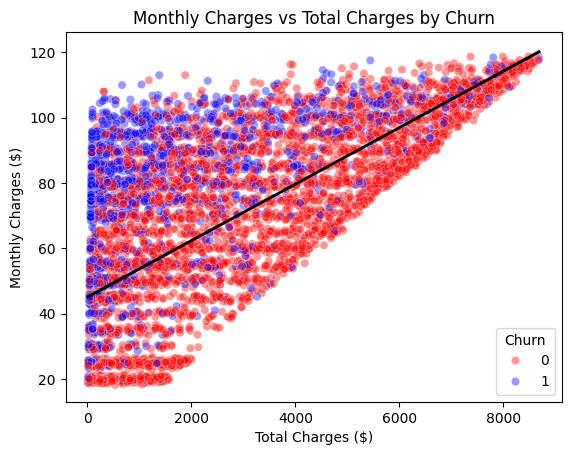


------------------------------------------
✅ Runtime: 627.7 ms | 💾 Mem: 115.30 MB (Δ +28.36 MB) | ⚙️ CPU: 20.5%


In [18]:
# Scatter plot with Churn color
sns.scatterplot(
    data=tlc_churn,
    x='TotalCharges',
    y='MonthlyCharges',
    hue='Churn',
    palette={1: 'blue', 0: 'red'},   # 1=Yes(blue), 0=No(red)
    alpha=0.4
)

# Add regression line (ignores Churn color, just shows global trend)
sns.regplot(
    data=tlc_churn,
    x='TotalCharges',
    y='MonthlyCharges',
    scatter=False,
    color='black',
    line_kws={'linewidth': 2}
)

plt.title("Monthly Charges vs Total Charges by Churn")
plt.xlabel("Total Charges ($)")
plt.ylabel("Monthly Charges ($)")
plt.show()

In [19]:
X = tlc_churn[['MonthlyCharges', 'TotalCharges']].values
y = tlc_churn['Churn'].values

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

neighbors = np.arange(1, 16)
train_accur = {}
test_accur = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accur[neighbor] = knn.score(X_train, y_train)
    test_accur[neighbor] = knn.score(X_test, y_test)

(7032, 2) (7032,)

------------------------------------------
✅ Runtime: 196.3 ms | 💾 Mem: 132.27 MB (Δ +16.97 MB) | ⚙️ CPU: 0.0%


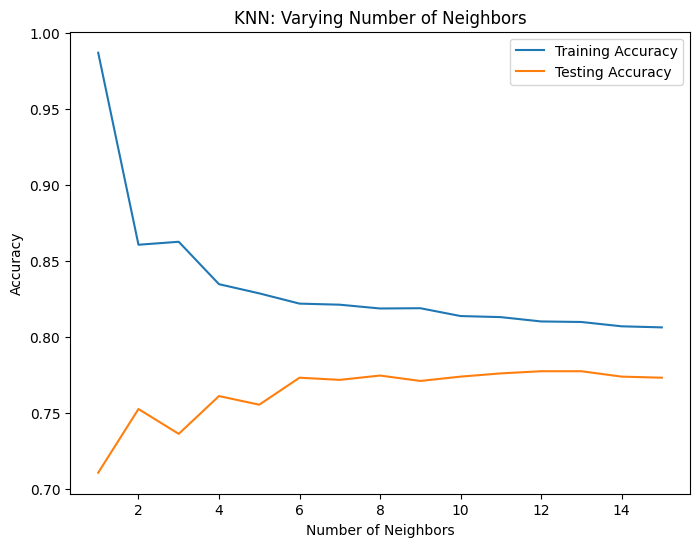


------------------------------------------
✅ Runtime: 83.4 ms | 💾 Mem: 132.80 MB (Δ +0.53 MB) | ⚙️ CPU: 26.2%


In [20]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accur.values(), label="Training Accuracy") 
plt.plot(neighbors, test_accur.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [21]:
prediction = knn.predict([..])
print("Churn:", "Yes" if prediction[0] == 1 else "No")

Churn: Yes

------------------------------------------
✅ Runtime: 7.9 ms | 💾 Mem: 132.84 MB (Δ +0.05 MB) | ⚙️ CPU: 38.6%


In [22]:
from sklearn.metrics import confusion_matrix

# yproba = knn.predict_proba(X_test)

print(confusion_matrix(y_test, prediction))w

ValueError: Found input variables with inconsistent numbers of samples: [1407, 1]


------------------------------------------
✅ Runtime: 112.8 ms | 💾 Mem: 156.45 MB (Δ +23.61 MB) | ⚙️ CPU: 20.5%
